In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../../data/year_state_district_house.csv", low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10441 entries, 0 to 10440
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    10441 non-null  int64 
 1   state                   10441 non-null  object
 2   congressional_district  10441 non-null  int64 
 3   party                   10441 non-null  object
 4   candidatevotes          10441 non-null  int64 
 5   totalvotes              10441 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 489.5+ KB


In [4]:
df['state'].unique()

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'FLORIDA', 'GEORGIA',
       'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA', 'IOWA', 'KANSAS',
       'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND', 'MASSACHUSETTS',
       'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI', 'MISSOURI', 'MONTANA',
       'NEBRASKA', 'NEVADA', 'NEW HAMPSHIRE', 'NEW JERSEY', 'NEW MEXICO',
       'NEW YORK', 'NORTH CAROLINA', 'NORTH DAKOTA', 'OHIO', 'OKLAHOMA',
       'OREGON', 'PENNSYLVANIA', 'RHODE ISLAND', 'SOUTH CAROLINA',
       'SOUTH DAKOTA', 'TENNESSEE', 'TEXAS', 'UTAH', 'VERMONT',
       'VIRGINIA', 'WASHINGTON', 'WEST VIRGINIA', 'WISCONSIN', 'WYOMING',
       'DISTRICT OF COLUMBIA'], dtype=object)

In [5]:
len(df['state'].unique())   

51

In [6]:
df['state'].isnull().sum()

0

In [7]:
df['year'].unique() 

array([1976, 1978, 1980, 1982, 1984, 1986, 1988, 1990, 1992, 1994, 1996,
       1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018,
       2020, 2022], dtype=int64)

In [8]:
len(df['year'].unique()) 

24

In [9]:
df['year'].isnull().sum()

0

In [10]:
df[df['state']=='DISTRICT OF COLUMBIA']

,year,state,congressional_district,party,candidatevotes,totalvotes
9657,2020,DISTRICT OF COLUMBIA,0,DEMOCRAT,281831,344177


In [11]:
df[df['state']=='DISTRICT OF COLUMBIA']

,year,state,congressional_district,party,candidatevotes,totalvotes
9657,2020,DISTRICT OF COLUMBIA,0,DEMOCRAT,281831,344177


In [12]:
df[['state','year']].drop_duplicates().groupby(['state']).size() #per ogni coppia stato anno c'è almeno un risultato

state
ALABAMA                 24
ALASKA                  24
ARIZONA                 24
ARKANSAS                24
CALIFORNIA              24
COLORADO                24
CONNECTICUT             24
DELAWARE                24
DISTRICT OF COLUMBIA     1
FLORIDA                 24
GEORGIA                 24
HAWAII                  24
IDAHO                   24
ILLINOIS                24
INDIANA                 24
IOWA                    24
KANSAS                  24
KENTUCKY                24
LOUISIANA               24
MAINE                   24
MARYLAND                24
MASSACHUSETTS           24
MICHIGAN                24
MINNESOTA               24
MISSISSIPPI             24
MISSOURI                24
MONTANA                 24
NEBRASKA                24
NEVADA                  24
NEW HAMPSHIRE           24
NEW JERSEY              24
NEW MEXICO              24
NEW YORK                24
NORTH CAROLINA          24
NORTH DAKOTA            24
OHIO                    24
OKLAHOMA              

In [13]:
df['congressional_district'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  0,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53], dtype=int64)

In [14]:
(df[['state','year', 'congressional_district']].drop_duplicates().groupby(['state']).size())/24
# il risultato dovrebbe essere il numero di distretti presenti nello stato
# (ma anche se è corretto, potrebbero esserci delle difformità nei dati)
# anche se negli anni il numero di distretti potrebbe essere stato modificato..

state
ALABAMA                  7.000000
ALASKA                   1.000000
ARIZONA                  6.708333
ARKANSAS                 4.000000
CALIFORNIA              49.833333
COLORADO                 6.375000
CONNECTICUT              5.541667
DELAWARE                 1.000000
DISTRICT OF COLUMBIA     0.041667
FLORIDA                 22.625000
GEORGIA                 11.833333
HAWAII                   2.000000
IDAHO                    2.000000
ILLINOIS                20.166667
INDIANA                  9.666667
IOWA                     5.083333
KANSAS                   4.333333
KENTUCKY                 6.333333
LOUISIANA                7.083333
MAINE                    2.000000
MARYLAND                 8.000000
MASSACHUSETTS           10.208333
MICHIGAN                16.041667
MINNESOTA                8.000000
MISSISSIPPI              4.541667
MISSOURI                 8.875000
MONTANA                  1.375000
NEBRASKA                 3.000000
NEVADA                   2.583333
NEW HAMP

In [15]:
df['party'].unique() #FOGLIETTA (DEMOCRAT) --> Thomas Michael Foglietta --> sbagliato perchè l'attributo rappresenta il winning party

array(['REPUBLICAN', 'DEMOCRAT', 'FOGLIETTA (DEMOCRAT)',
       'DEMOCRATIC-FARMER-LABOR', 'INDEPENDENT', 'INDEPENDENT-REPUBLICAN'],
      dtype=object)

In [16]:
df[df['party']=='FOGLIETTA (DEMOCRAT)']

,year,state,congressional_district,party,candidatevotes,totalvotes
1204,1980,PENNSYLVANIA,1,FOGLIETTA (DEMOCRAT),58737,155451


In [17]:
df['candidatevotes'].min()

-1

In [18]:
len(df[df['candidatevotes']==-1])

1

In [19]:
df[df['candidatevotes']==-1]

,year,state,congressional_district,party,candidatevotes,totalvotes
9682,2020,FLORIDA,25,REPUBLICAN,-1,-1


In [20]:
df['candidatevotes'].max()

1165136

In [21]:
df[df['candidatevotes']==1165136]

,year,state,congressional_district,party,candidatevotes,totalvotes
10186,2022,MAINE,2,DEMOCRAT,1165136,2656104


In [22]:
df['totalvotes'].min()

-1

In [23]:
len(df[df['totalvotes']==-1])

1

In [24]:
df[df['totalvotes']==-1]

,year,state,congressional_district,party,candidatevotes,totalvotes
9682,2020,FLORIDA,25,REPUBLICAN,-1,-1


In [25]:
df[df['congressional_district']==0].sort_values('state')

,year,state,congressional_district,party,candidatevotes,totalvotes
7,1976,ALASKA,0,REPUBLICAN,83722,118208
5227,2000,ALASKA,0,REPUBLICAN,190862,274393
2182,1986,ALASKA,0,REPUBLICAN,101799,180277
7837,2012,ALASKA,0,REPUBLICAN,185296,289804
8707,2016,ALASKA,0,REPUBLICAN,155088,308198
...,...,...,...,...,...,...
2174,1984,WYOMING,0,REPUBLICAN,138234,187904
7829,2010,WYOMING,0,REPUBLICAN,131661,190822
5219,1998,WYOMING,0,REPUBLICAN,100687,174219
6524,2004,WYOMING,0,REPUBLICAN,132107,239163


Text(0.5, 0, 'attributes')

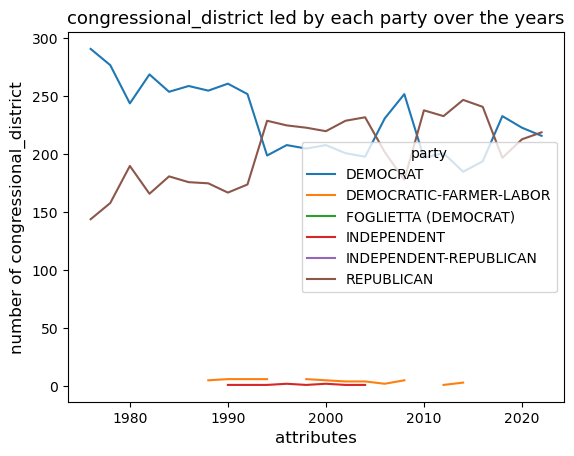

In [28]:
ax= df.pivot_table(index = 'year', columns = 'party', values = 'state', aggfunc = 'count').plot()
ax.set_title("congressional_district led by each party over the years",fontsize=13)
ax.set_ylabel("number of congressional_district",fontsize=12)
ax.set_xlabel("attributes",fontsize=12)

<Axes: xlabel='year'>

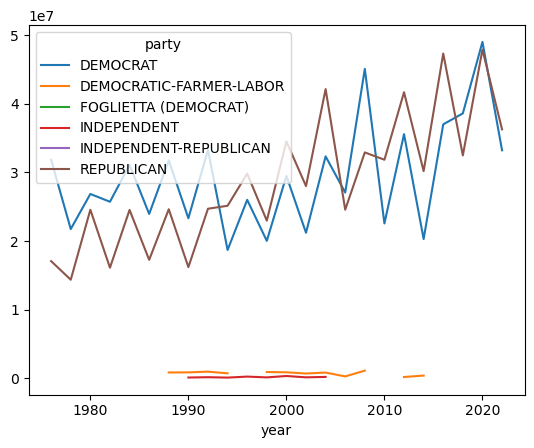

In [27]:
df.pivot_table(index = 'year', columns = 'party', values = 'candidatevotes', aggfunc = 'sum').plot()

In [28]:
df.duplicated().sum()

0

In [29]:
import pandas as pd
import numpy as np

def get_converted_year_state_district_house__df(path = 'year_state_district_house.csv') -> pd.DataFrame:
   
    dtype={
        'year': 'Int64',
        'state': 'string',
        'congressional_district': 'Int64',
        'party': 'string',
        'candidatevotes': 'Int64',
        'totalvotes': 'Int64'
    }

    df = pd.read_csv(path, sep=',', low_memory=False, dtype=dtype)
    
    return df

In [30]:
df = get_converted_year_state_district_house__df()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10441 entries, 0 to 10440
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    10441 non-null  Int64 
 1   state                   10441 non-null  string
 2   congressional_district  10441 non-null  Int64 
 3   party                   10441 non-null  string
 4   candidatevotes          10441 non-null  Int64 
 5   totalvotes              10441 non-null  Int64 
dtypes: Int64(4), string(2)
memory usage: 530.3 KB


In [31]:
df[df['party']=='FOGLIETTA (DEMOCRAT)']

,year,state,congressional_district,party,candidatevotes,totalvotes
1204,1980,PENNSYLVANIA,1,FOGLIETTA (DEMOCRAT),58737,155451


In [32]:
df[df['party']=='FOGLIETTA (DEMOCRAT)']['party']

1204    FOGLIETTA (DEMOCRAT)
Name: party, dtype: string

In [33]:
df[df['party']=='INDEPENDENT']['party'].count()

10

In [34]:
df=df.replace('FOGLIETTA (DEMOCRAT)', 'INDEPENDENT')

In [35]:
df[df['party']=='FOGLIETTA (DEMOCRAT)']['party']

Series([], Name: party, dtype: string)

In [36]:
df[df['party']=='INDEPENDENT']['party'].count()

11

In [37]:
df[df['candidatevotes']==-1] 

,year,state,congressional_district,party,candidatevotes,totalvotes
9682,2020,FLORIDA,25,REPUBLICAN,-1,-1


In [38]:
df[df['totalvotes']==-1]

,year,state,congressional_district,party,candidatevotes,totalvotes
9682,2020,FLORIDA,25,REPUBLICAN,-1,-1


In [39]:
df[df['totalvotes']<=0]

,year,state,congressional_district,party,candidatevotes,totalvotes
8810,2016,FLORIDA,24,DEMOCRAT,0,0
9682,2020,FLORIDA,25,REPUBLICAN,-1,-1


In [40]:
df[df['candidatevotes']<=0]

,year,state,congressional_district,party,candidatevotes,totalvotes
8810,2016,FLORIDA,24,DEMOCRAT,0,0
9682,2020,FLORIDA,25,REPUBLICAN,-1,-1


In [41]:
df[df['candidatevotes']<=0]

,year,state,congressional_district,party,candidatevotes,totalvotes
8810,2016,FLORIDA,24,DEMOCRAT,0,0
9682,2020,FLORIDA,25,REPUBLICAN,-1,-1
